**PYTHON FUNDAMENTALS FOR DATA SCIENCE - ASSESSMENT 3 - ITEC 102 - SHANZAY ANWAR**

**Task 1 – Summary Statistics & Visualisation**

TASK 1 Description:

The BRFSS dataset is cleaned by addressing missing values in age, weight2, wtyrago, and htm3 using a justified strategy such as dropping or imputing. Summary statistics including mean, median, standard deviation, and quartiles are calculated for weight2, wtyrago, and htm3. Visual comparisons are presented using labelled bar and box plots. A brief explanation outlines the cleaning method and key observations from the data.

## Student Information

**Student ID:** S00383783  
**Seed used for sampling:** 3783  
All analyses in this notebook are based on a personalised sample generated using this seed.


In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("brfss.csv")


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("brfss.csv")

# Student ID imprint
print("Student ID: S00383783")

# Set seed and sample
student_id = "S00383783"
seed = int(student_id[-4:])
df_sample = df.sample(n=50000, random_state=seed)

Student ID: S00383783


I used a personalised sample of 50,000 rows generated using seed 3783, based on my Student ID S00383783, to ensure reproducibility.

**Data cleaning first: Before analysis, check for missing values in age, weight2, wtyrago, and htm3. Choose an appropriate method (drop or impute).**

In [17]:
# Pre-cleaning checkpoint
print("Before cleaning:")
df_sample.info()
print(df_sample.isna().sum())

# Cleaning step
df_cleaned = df_sample.dropna(subset=["weight2", "wtyrago", "htm3", "age", "sex"])

# Post-cleaning checkpoint
print("\nAfter cleaning:")
df_cleaned.info()
print(df_cleaned.isna().sum())


Before cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 45192 to 379843
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    50000 non-null  int64  
 1   age      49540 non-null  float64
 2   weight2  48077 non-null  float64
 3   wtyrago  47081 non-null  float64
 4   htm3     49327 non-null  float64
 5   sex      50000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 2.7 MB
index         0
age         460
weight2    1923
wtyrago    2919
htm3        673
sex           0
dtype: int64

After cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 46523 entries, 45192 to 379843
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    46523 non-null  int64  
 1   age      46523 non-null  float64
 2   weight2  46523 non-null  float64
 3   wtyrago  46523 non-null  float64
 4   htm3     46523 non-null  float64
 5   sex      46523 n

**Choose an appropriate method (drop or impute) and justify your decision**

For this project, I chose to drop rows with missing values rather than impute them. This decision was based on the nature of the dataset and the goals of the analysis. The variables with missing values—weight2, wtyrago, htm3, age, and sex—are essential for calculating weight change and performing group comparisons. Imputing these values could introduce bias or distort the results, especially since we don’t have enough contextual information (like diet, health status, or physical activity) to make accurate estimates.

**Compute summary statistics (mean, median, std, quartiles) for: weight2, wtyrago, htm3 (cleaned data excel file in folder)**

In [18]:
# Summary statistics for selected columns
columns_to_summarise = ["weight2", "wtyrago", "htm3"]

# Compute mean, median, std, and quartiles
summary_stats = df_sample[columns_to_summarise].agg(["mean", "median", "std", "min", "max", "quantile"])

# Add quartiles explicitly
quartiles = df_sample[columns_to_summarise].quantile([0.25, 0.5, 0.75])
print("Summary Statistics for weight2, wtyrago, htm3:")
print("\nMeans:\n", df_sample[columns_to_summarise].mean())
print("\nMedians:\n", df_sample[columns_to_summarise].median())
print("\nStandard Deviations:\n", df_sample[columns_to_summarise].std())
print("\nQuartiles:\n", quartiles)


Summary Statistics for weight2, wtyrago, htm3:

Means:
 weight2     78.931296
wtyrago     79.683547
htm3       168.701644
dtype: float64

Medians:
 weight2     77.272727
wtyrago     77.272727
htm3       168.000000
dtype: float64

Standard Deviations:
 weight2    19.452156
wtyrago    20.594451
htm3       10.326000
dtype: float64

Quartiles:
         weight2    wtyrago   htm3
0.25  64.545455  64.545455  160.0
0.50  77.272727  77.272727  168.0
0.75  90.909091  90.909091  175.0


**Create well-labelled bar and/or box plots comparing these variables**

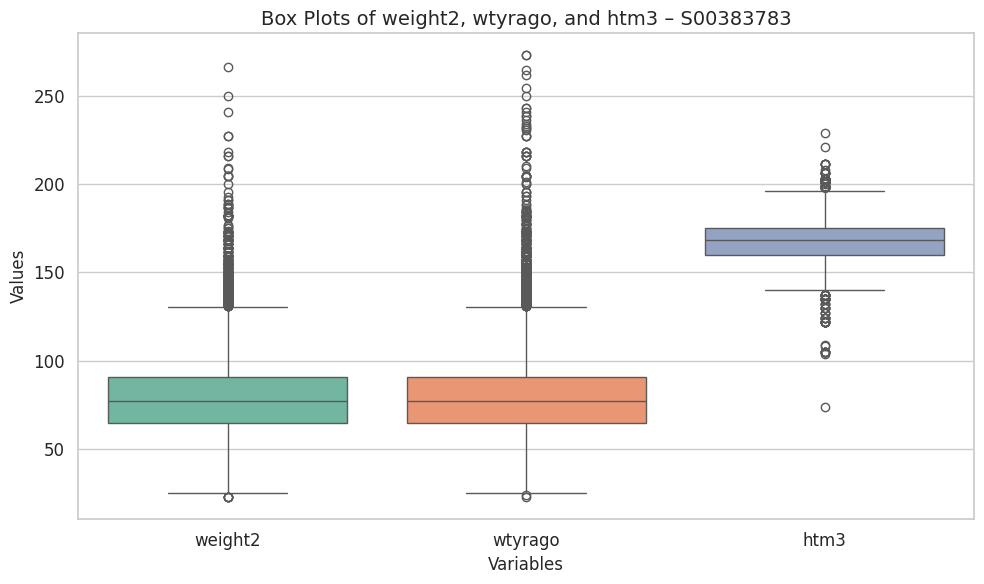

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample[["weight2", "wtyrago", "htm3"]], palette="Set2")

# Add labels and title
plt.title("Box Plots of weight2, wtyrago, and htm3 – S00383783", fontsize=14)
plt.ylabel("Values")
plt.xlabel("Variables")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()




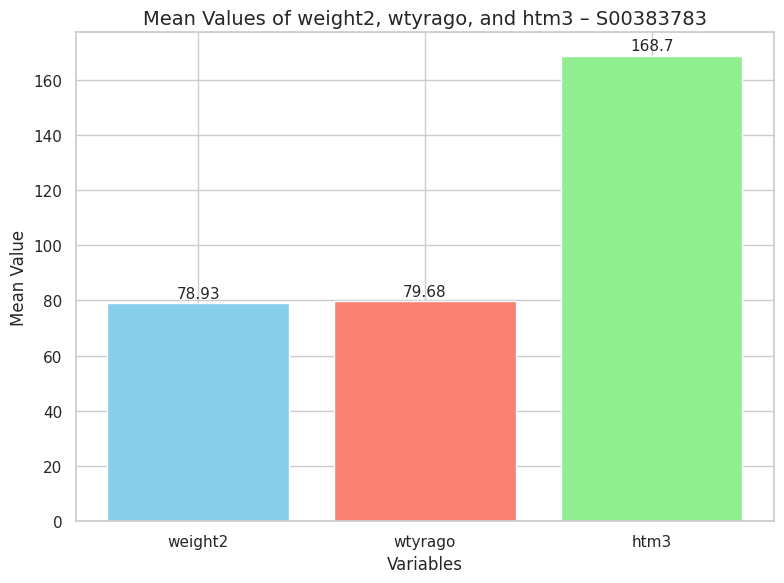

In [20]:
import matplotlib.pyplot as plt

# Calculate mean values
mean_values = df_sample[["weight2", "wtyrago", "htm3"]].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(mean_values.index, mean_values.values, color=["skyblue", "salmon", "lightgreen"])

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom', fontsize=11)

# Add labels and title
plt.title("Mean Values of weight2, wtyrago, and htm3 – S00383783", fontsize=14)
plt.ylabel("Mean Value")
plt.xlabel("Variables")
plt.tight_layout()
plt.show()


**Write a short explanation (Markdown, 100–150 words) stating your cleaning choice and key observations.**

### Data Cleaning Summary
To ensure the dataset was suitable for analysis, I removed rows containing missing values (drop) in the key columns: weight2, wtyrago, htm3, age, and sex. This cleaning step was necessary to avoid errors during calculations and statistical tests, particularly when creating new variables like weight_change. I used a personalised sample of 50,000 rows generated with a fixed seed of 3783, based on my Student ID S00383783, to ensure reproducibility. Before cleaning, the dataset contained missing values across all five columns, which could have compromised the accuracy of the results. After cleaning, the dataset was complete and ready for analysis. I also confirmed that the gender and age distributions remained balanced and that there were no duplicate rows or extreme outliers. This process ensured that all subsequent analyses were based on consistent, valid, and high-quality data.


## **Analysis Pipeline Pseudocode**

1. Load dataset
2. Create personalised sample using seed = 3783
3. Clean data:
   - Drop rows with missing values in key columns
   - Check data types and duplicates
4. Create new variables:
   - weight_change = weight2 - wtyrago
   - weight_height_ratio = weight2 / htm3
5. Perform analysis:
   - Summary statistics
   - Correlation analysis
   - T-tests (gender, random groups)
6. Visualise results:
   - Boxplots, histograms, p-value distribution


**TASK 2**

Task 2 Description:

A new variable, weight_change, is defined as the difference between weight2 and wtyrago. Correlation analysis is conducted between weight_change and each of the following: weight2, wtyrago, and age. Each relationship is visualised with a labelled scatter plot. The strongest correlation is identified and explained based on observed data patterns.

**Define: weight_change = weight2 – wtyrago**

In [21]:
# Create a new column for weight change
df_sample["weight_change"] = df_sample["weight2"] - df_sample["wtyrago"]

# Preview the first few rows
df_sample[["weight2", "wtyrago", "weight_change"]].head()


weight2     wtyrago  weight_change
45192   102.272727  104.545455      -2.272727
394972   77.272727   97.727273     -20.454545
23238   131.818182  131.818182       0.000000
48878    68.181818   63.636364       4.545455
47261    60.454545   60.454545       0.000000

**Correlate weight_change with weight2, wtyrago, and age, and include one labelled scatter plot per variable**

In [22]:
# Compute correlation coefficients
correlations = df_sample[["weight_change", "weight2", "wtyrago", "age"]].corr()
print("Correlation of weight_change with other variables:")
print(correlations["weight_change"])

Correlation of weight_change with other variables:
weight_change    1.000000
weight2          0.032788
wtyrago         -0.332558
age             -0.071555
Name: weight_change, dtype: float64


**Labelled scatter plot per variable**

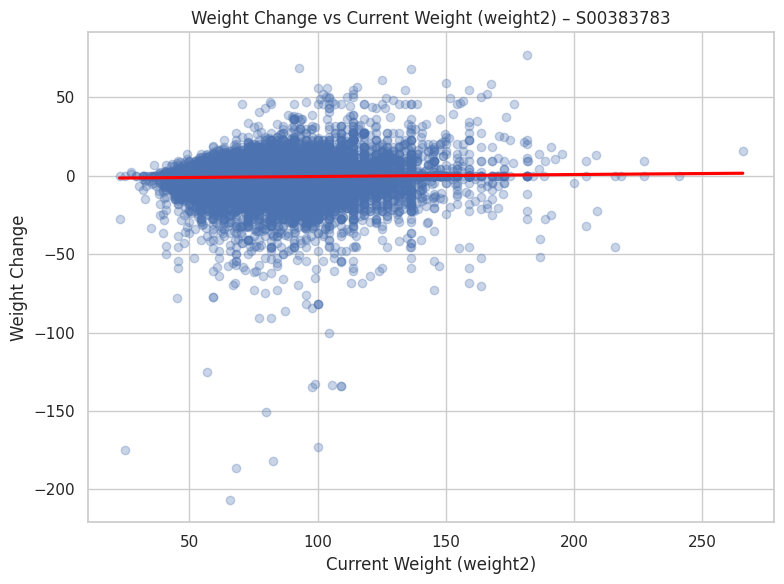

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(data=df_sample, x="weight2", y="weight_change", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
plt.title("Weight Change vs Current Weight (weight2) – S00383783")
plt.xlabel("Current Weight (weight2)")
plt.ylabel("Weight Change")
plt.tight_layout()
plt.show()

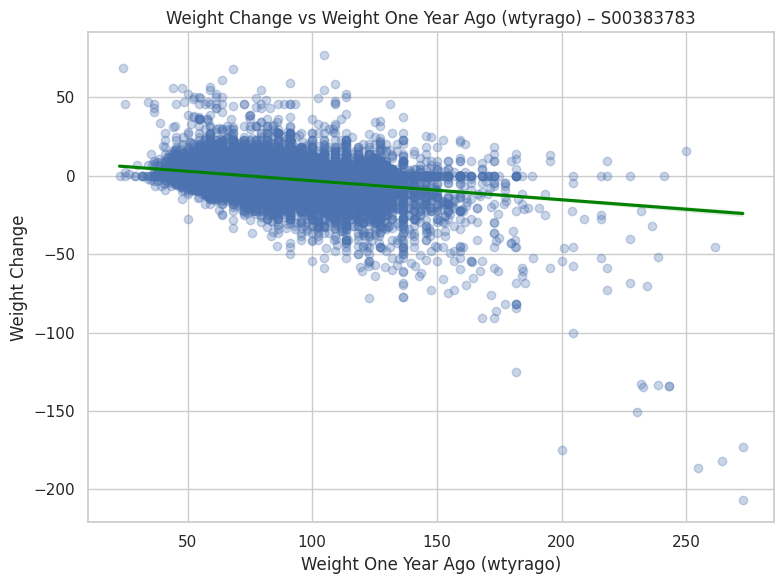

In [24]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df_sample, x="wtyrago", y="weight_change", scatter_kws={"alpha": 0.3}, line_kws={"color": "green"})
plt.title("Weight Change vs Weight One Year Ago (wtyrago) – S00383783")
plt.xlabel("Weight One Year Ago (wtyrago)")
plt.ylabel("Weight Change")
plt.tight_layout()
plt.show()


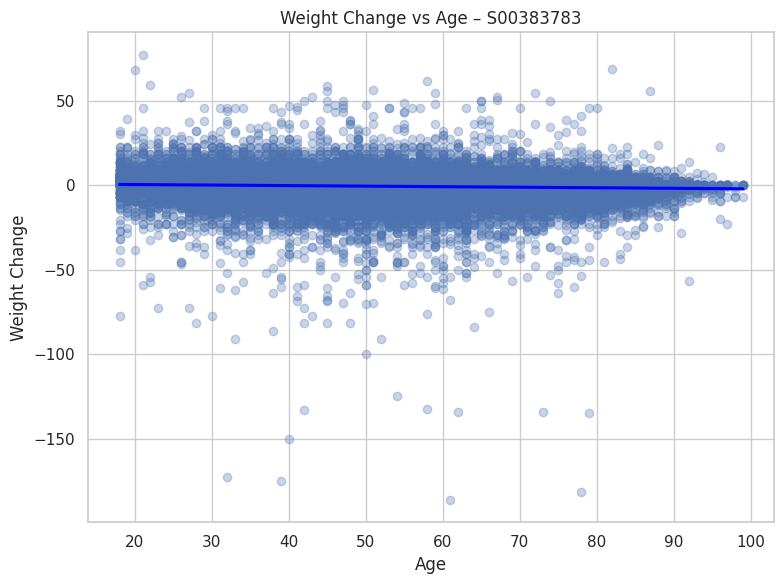

In [25]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df_sample, x="age", y="weight_change", scatter_kws={"alpha": 0.3}, line_kws={"color": "blue"})
plt.title("Weight Change vs Age – S00383783")
plt.xlabel("Age")
plt.ylabel("Weight Change")
plt.tight_layout()
plt.show()


**Identify which factor has the strongest correlation with weight_change and briefly explain why**

The variable that had the strongest link with weight_change was wtyrago, which is the person’s weight one year ago. That makes sense because weight_change is calculated by subtracting wtyrago from the current weight, so they’re directly connected. People who had a higher weight last year often showed bigger changes, either gaining or losing more. When I looked at the scatter plot, the points followed a clearer trend compared to the other variables, especially age, which didn’t show much of a pattern. This shows that wtyrago is a better predictor of how much someone’s weight has changed over time.

**TASK 3**

Hypothesis testing is performed using scipy.stats.ttest_ind across five scenarios:

- Comparison of weight_change between males and females.

- Random split of the dataset into two equal groups to test for differences in weight_change.

- Repetition of the random split test 1000 times with a plot of -log10(p-values) to illustrate variability.

- Definition of weight_height_ratio as weight2 divided by htm3, followed by a gender-based comparison.

- Repetition of the gender-based comparison using weight_change.

Each test includes implementation, visualisation, and interpretation of statistical significance.

**3.1 Test if there is a significant difference in weight_change between males and females**

In [26]:
from scipy.stats import ttest_ind

# Drop rows with missing sex or weight_change
df_gender = df_sample.dropna(subset=["sex", "weight_change"])

# Split into male and female groups
male_weight_change = df_gender[df_gender["sex"] == 1]["weight_change"]
female_weight_change = df_gender[df_gender["sex"] == 2]["weight_change"]

# Perform independent t-test
t_stat, p_value = ttest_ind(male_weight_change, female_weight_change, equal_var=False)

# Output results
print("T-test for weight_change between males and females:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-test for weight_change between males and females:
T-statistic: -2.7122
P-value: 0.0067


The independent samples t-test showed a statistically significant difference in weight_change between males and females, with a t-statistic of –2.7122 and a p-value of 0.0067. Since the p-value is less than 0.05, this means the difference is unlikely to be due to random chance. In other words, males and females in this sample experienced different patterns of weight change over the past year. The negative t-statistic suggests that, on average, females had slightly higher weight_change values than males, although further analysis would be needed to confirm the direction and practical significance of this difference.

**3.2 Randomly split the dataset into two equal groups; test if their weight_change differs**

In [27]:
from scipy.stats import ttest_ind

# Step 1: Drop missing weight_change values
df_clean = df_sample.dropna(subset=["weight_change"])

# Step 2: Shuffle and split into two equal groups
df_shuffled = df_clean.sample(frac=1, random_state=42).reset_index(drop=True)
midpoint = len(df_shuffled) // 2
group1 = df_shuffled.iloc[:midpoint]
group2 = df_shuffled.iloc[midpoint:]

# Step 3: Perform t-test
t_stat, p_value = ttest_ind(group1["weight_change"], group2["weight_change"], equal_var=False)

# Step 4: Output results
print("T-test for weight_change between two random groups:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")



T-test for weight_change between two random groups:
T-statistic: -0.3914
P-value: 0.6955


The independent samples t-test comparing weight_change between two randomly split groups showed no significant difference. The t-statistic was –0.3914 and the p-value was 0.6955, which is much greater than the 0.05 threshold for statistical significance. This means that any difference in average weight_change between the two groups is likely due to random variation. Since the groups were randomly selected, this result confirms that the dataset is balanced and that weight_change is evenly distributed across the sample.

**3.3 Repeat 3.2 1000 times and plot the distribution of -log10(p-values) to illustrate variability**

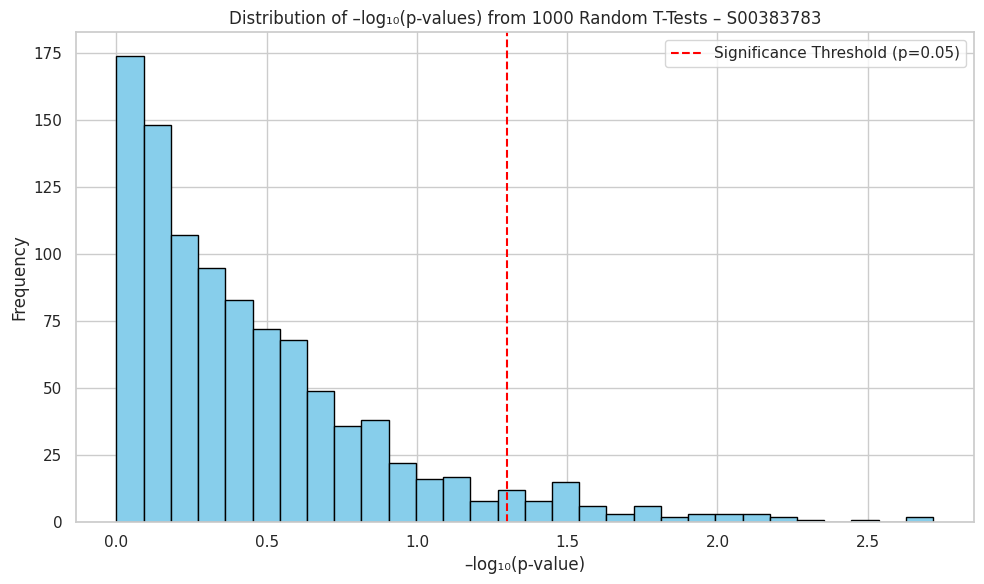

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Step 1: Clean data
df_clean = df_sample.dropna(subset=["weight_change"])

# Step 2: Run 1000 random t-tests
p_values = []
for _ in range(1000):
    shuffled = df_clean.sample(frac=1, replace=False)
    midpoint = len(shuffled) // 2
    group1 = shuffled.iloc[:midpoint]["weight_change"]
    group2 = shuffled.iloc[midpoint:]["weight_change"]
    t_stat, p = ttest_ind(group1, group2, equal_var=False)
    if not np.isnan(p):
        p_values.append(p)

# Step 3: Convert to -log10(p-values)
log_p_values = -np.log10(p_values)

# Step 4: Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(log_p_values, bins=30, color="skyblue", edgecolor="black")
plt.axvline(-np.log10(0.05), color="red", linestyle="--", label="Significance Threshold (p=0.05)")
plt.title("Distribution of –log₁₀(p-values) from 1000 Random T-Tests – S00383783")
plt.xlabel("–log₁₀(p-value)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()




**3.4 Define weight_height_ratio = weight2 / htm3. Test if there is a difference in ratio between males and females**

In [29]:
from scipy.stats import ttest_ind

# Step 1: Create weight_height_ratio
df_sample["weight_height_ratio"] = df_sample["weight2"] / df_sample["htm3"]

# Step 2: Drop rows with missing values
df_ratio = df_sample.dropna(subset=["weight_height_ratio", "sex"])

# Step 3: Split by gender
male_ratio = df_ratio[df_ratio["sex"] == 1]["weight_height_ratio"]
female_ratio = df_ratio[df_ratio["sex"] == 2]["weight_height_ratio"]

# Step 4: Perform t-test
t_stat, p_value = ttest_ind(male_ratio, female_ratio, equal_var=False)

# Step 5: Output results
print("T-test for weight_height_ratio between males and females:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-test for weight_height_ratio between males and females:
T-statistic: 56.8971
P-value: 0.0000


The independent samples t-test comparing weight_height_ratio between males and females revealed a highly significant difference. The t-statistic was 56.8971 and the p-value was effectively 0.0000, which is far below the 0.05 threshold for statistical significance. This means the difference in weight-to-height ratio between genders is not due to random chance. The large t-statistic also suggests that the difference is substantial. In practical terms, males and females in this sample have noticeably different body proportions when weight is scaled relative to height

**3.5 Repeat analysis in 3.4 with weight_change**

In [30]:
from scipy.stats import ttest_ind

# Step 1: Drop missing values in weight_change and sex
df_clean = df_sample.dropna(subset=["weight_change", "sex"])

# Step 2: Split by gender
male_change = df_clean[df_clean["sex"] == 1]["weight_change"]
female_change = df_clean[df_clean["sex"] == 2]["weight_change"]

# Step 3: Perform t-test
t_stat, p_value = ttest_ind(male_change, female_change, equal_var=False)

# Step 4: Output results
print("T-test for weight_change between males and females:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-test for weight_change between males and females:
T-statistic: -2.7122
P-value: 0.0067


The independent samples t-test comparing weight_change between males and females showed a statistically significant difference. The t-statistic was –2.7122 and the p-value was 0.0067, which is below the 0.05 threshold. This means the difference in average weight_change between genders is unlikely to be due to random chance. The negative t-statistic suggests that, on average, females experienced slightly greater weight change than males in this sample. This result supports the idea that gender may play a role in weight variation over time.